# Sea Level UHSLC Data
Notebook for analysing tide measurement data for all locations inside the GLOSS network. Data has been obtained on 14 October 2016.

Data source is University of Hawaii Sea Level Center (uhslc). Data set with daily gauge data (http://uhslc.soest.hawaii.edu/data/)

In [2]:
%matplotlib inline

from datetime import datetime
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['svg.fonttype'] = 'none'

Read data for all stations of UHSLC

In [31]:
stations = pd.read_csv('data/metadata_uhslc.csv', usecols=[0,1,2,3,4,5])

stations['UH#'] = stations['UH#'].apply(lambda x: '{0:0>4}'.format(x))

stations['tag'] = 'uhslc'

stations.head()

UH#  GLOSS#                Location                          Country  \
0  0001   115.0                 Pohnpei  Micronesia, Federated States of   
1  0002   113.0          Betio (Tarawa)                         Kiribati   
2  0003   169.0  Baltra (Galapagos Is.)                          Ecuador   
3  0004   114.0                   Nauru                            Nauru   
4  0005   112.0                  Majuro                 Marshall Islands   

   Latitude  Longitude    tag  
0     6.960    158.210  uhslc  
1     1.350    172.917  uhslc  
2    -0.433    -90.283  uhslc  
3     0.533    166.930  uhslc  
4     7.117    171.367  uhslc

Read all the tide data from uhslc website

In [4]:
def getData(number):
    filename = 'fdd' + str(number) + '.csv'
    url = 'http://uhslc.soest.hawaii.edu/data/csv3/fdd/' + filename
    filepath = 'data/uhslc_data/' + filename
    if os.path.exists(filepath):
        df = pd.read_csv(filepath)
    else:
        try:
            df = pd.read_csv(url, header=None, names=['year', 'month', 'day', 'tide'])
            df.to_csv(filepath, index=False)
        except Exception:
            return pd.DataFrame()
    
    df['key'] = number
    print(filename)
    return df
   
df = pd.concat([getData(f) for f in stations['UH#']])

df['timestamp'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')

df.head()

df.dtypes


fdd0001.csv
fdd0002.csv
fdd0003.csv
fdd0004.csv
fdd0005.csv
fdd0007.csv
fdd0008.csv
fdd0009.csv
fdd0011.csv
fdd0013.csv
fdd0014.csv
fdd0015.csv
fdd0016.csv
fdd0017.csv
fdd0018.csv
fdd0019.csv
fdd0021.csv
fdd0022.csv
fdd0023.csv
fdd0024.csv
fdd0025.csv
fdd0028.csv
fdd0029.csv
fdd0030.csv
fdd0031.csv
fdd0033.csv
fdd0034.csv
fdd0035.csv
fdd0038.csv
fdd0039.csv
fdd0040.csv
fdd0041.csv
fdd0043.csv
fdd0046.csv
fdd0047.csv
fdd0049.csv
fdd0050.csv
fdd0051.csv
fdd0052.csv
fdd0053.csv
fdd0055.csv
fdd0056.csv
fdd0057.csv
fdd0058.csv
fdd0059.csv
fdd0060.csv
fdd0061.csv
fdd0071.csv
fdd0072.csv
fdd0079.csv
fdd0080.csv
fdd0081.csv
fdd0082.csv
fdd0083.csv
fdd0084.csv
fdd0087.csv
fdd0088.csv
fdd0090.csv
fdd0091.csv
fdd0092.csv
fdd0093.csv
fdd0094.csv
fdd0101.csv
fdd0103.csv
fdd0104.csv
fdd0105.csv
fdd0107.csv
fdd0108.csv
fdd0109.csv
fdd0110.csv
fdd0113.csv
fdd0114.csv
fdd0115.csv
fdd0117.csv
fdd0118.csv
fdd0119.csv
fdd0121.csv
fdd0122.csv
fdd0123.csv
fdd0124.csv
fdd0125.csv
fdd0126.csv
fdd0127.csv
fdd0

year                  int64
month                 int64
day                   int64
tide                  int64
key                  object
timestamp    datetime64[ns]
dtype: object

Merge stations and uhslc tide data

In [5]:
df = df.merge(stations, left_on='key', right_on='UH#')

df.to_csv('data/uhslc_data/uhslcData.csv')

df.tail(10)

df.dtypes

year                  int64
month                 int64
day                   int64
tide                  int64
key                  object
timestamp    datetime64[ns]
UH#                  object
GLOSS#              float64
Location             object
Country              object
Latitude            float64
Longitude           float64
tag                  object
dtype: object

In [6]:
df.Location.value_counts()

#Grouped by stations

stations_grouped = df.groupby(['Location'])

stations_grouped.head()


data_UK = df[(df.Country == 'United Kingdom')].groupby(['Location', 'timestamp']).tide.mean().unstack().T
data_UK

Location    Ascension (English Bay)  Bermuda St. Georges Is.  Diego Garcia  \
timestamp                                                                    
1915-04-23                      NaN                      NaN           NaN   
1915-04-24                      NaN                      NaN           NaN   
1915-04-25                      NaN                      NaN           NaN   
1915-04-26                      NaN                      NaN           NaN   
1915-04-27                      NaN                      NaN           NaN   
1915-04-28                      NaN                      NaN           NaN   
1915-04-29                      NaN                      NaN           NaN   
1915-04-30                      NaN                      NaN           NaN   
1915-05-01                      NaN                      NaN           NaN   
1915-05-02                      NaN                      NaN           NaN   
1915-05-03                      NaN                      NaN           NaN   
1915-05-04                      NaN                      NaN           NaN   
1915-05-05                      NaN                      NaN           NaN   
1915-05-06                      NaN                      NaN           NaN   
1915-05-07                      NaN                      NaN           NaN   
1915-05-08                      NaN                      NaN           NaN   
1915-05-09                      NaN                      NaN           NaN   
1915-05-10                      NaN                      NaN           NaN   
1915-05-11                      NaN                      NaN           NaN   
1915-05-12                      NaN                      NaN           NaN   
1915-05-13                      NaN                      NaN           NaN   
1915-05-14                      NaN                      NaN           NaN   
1915-05-15                      NaN                      NaN           NaN   
1915-05-16                      NaN                      NaN           NaN   
1915-05-17                      NaN                      NaN           NaN   
1915-05-18                      NaN                      NaN           NaN   
1915-05-19                      NaN                      NaN           NaN   
1915-05-20                      NaN                      NaN           NaN   
1915-05-21                      NaN                      NaN           NaN   
1915-05-22                      NaN                      NaN           NaN   
...                             ...                      ...           ...   
2016-06-01                    -40.0                      NaN           NaN   
2016-06-02                    -75.0                      NaN           NaN   
2016-06-03                    -62.0                      NaN           NaN   
2016-06-04                    -91.0                      NaN           NaN   
2016-06-05                   -117.0                      NaN           NaN   
2016-06-06                   -102.0                      NaN           NaN   
2016-06-07                   -125.0                      NaN           NaN   
2016-06-08                   -136.0                      NaN           NaN   
2016-06-09                   -131.0                      NaN           NaN   
2016-06-10                   -125.0                      NaN           NaN   
2016-06-11                   -124.0                      NaN           NaN   
2016-06-12                   -129.0                      NaN           NaN   
2016-06-13                   -124.0                      NaN           NaN   
2016-06-14                   -116.0                      NaN           NaN   
2016-06-15                   -110.0                      NaN           NaN   
2016-06-16                   -125.0                      NaN           NaN   
2016-06-17                   -144.0                      NaN           NaN   
2016-06-18                   -146.0                      NaN           NaN   
2016-06-19            

In [7]:
#plot_data = df[(df.year >= 2006)].groupby(['Location', 'timestamp']).tide.mean().unstack().T.resample('A').mean()


plot_data = df[(df.timestamp.dt.year >= 1970)
              ].groupby(['Location', 'timestamp']).tide.mean().unstack().T.resample('1A').mean()

plot_data

Location       Abashiri     Aburatsu  Acajutla (Acajutia)     Acapulco  \
timestamp                                                                
1970-12-31  1439.782123  1493.752809                  NaN          NaN   
1971-12-31  1438.613707  1506.490411                  NaN          NaN   
1972-12-31  1458.062500  1551.871585                  NaN          NaN   
1973-12-31  1457.232493  1522.041096                  NaN          NaN   
1974-12-31  1472.083056  1544.747945                  NaN          NaN   
1975-12-31  1422.985795  1559.673973                  NaN          NaN   
1976-12-31  1459.070822  1490.759563                  NaN          NaN   
1977-12-31  1419.989041  1509.947945                  NaN          NaN   
1978-12-31  1439.816438  1499.328767                  NaN          NaN   
1979-12-31  1420.150685  1495.106849                  NaN          NaN   
1980-12-31  1423.265027  1495.210383                  NaN          NaN   
1981-12-31  1474.140449  1517.495890                  NaN          NaN   
1982-12-31  1435.121547  1463.492997                  NaN          NaN   
1983-12-31  1460.581006  1471.186301                  NaN          NaN   
1984-12-31  1477.901639  1467.191257                  NaN          NaN   
1985-12-31  1445.854795  1447.536986                  NaN          NaN   
1986-12-31  1464.829912  1499.186301                  NaN          NaN   
1987-12-31  1455.852055  1483.295890                  NaN          NaN   
1988-12-31  1427.363388  1478.131148                  NaN          NaN   
1989-12-31  1421.191781  1543.123288                  NaN          NaN   
1990-12-31  1413.093151  1493.854795                  NaN          NaN   
1991-12-31  1450.035616  1531.893151                  NaN          NaN   
1992-12-31  1440.136612  1546.215847                  NaN          NaN   
1993-12-31  1458.279452  1510.079452                  NaN          NaN   
1994-12-31  1486.246575  1564.531507                  NaN          NaN   
1995-12-31  1512.484932  1513.093151                  NaN          NaN   
1996-12-31  1492.032787  1521.158470                  NaN          NaN   
1997-12-31  1521.608219  1538.350685                  NaN          NaN   
1998-12-31  1481.134247  1566.515068                  NaN          NaN   
1999-12-31  1503.504110  1587.800000                  NaN          NaN   
2000-12-31  1513.677612  1536.715847                  NaN          NaN   
2001-12-31  1482.008219  1579.290411                  NaN          NaN   
2002-12-31  1507.758904  1591.915068                  NaN          NaN   
2003-12-31  1477.717808  1583.852055                  NaN          NaN   
2004-12-31  1530.846995  1583.653005                  NaN          NaN   
2005-12-31  1522.484932  1521.643836                  NaN          NaN   
2006-12-31  1484.126027  1582.717808                  NaN          NaN   
2007-12-31  1488.191781  1553.975342                  NaN   949.468468   
2008-12-31  1472.319672  1558.538251                  NaN  1011.131148   
2009-12-31  1501.904110  1573.750685                  NaN  1043.345205   
2010-12-31  1518.232044  1587.926027          1412.432836  1008.857534   
2011-12-31  1513.945205  1598.419178          1471.454795   919.052632   
2012-12-31  1493.370879  1635.852459          1497.464286          NaN   
2013-12-31  1527.071233  1582.852055          1481.416667          NaN   
2014-12-31  1530.101648  1606.118132          1549.102410          NaN   
2015-12-31  1517.512329  1596.989041          1600.145963          NaN   
2016-12-31  1500.204420  1579.558011          1490.410959          NaN   

Location           Adak         Aden       Alert   Alexandria        Ambon  \
timestamp                                                                    
1970-12-31  1603.490251          NaN         NaN          NaN          NaN   
1971-12-31  1568.232877          NaN         NaN          NaN          NaN   
1972-12-31  1550.526316          NaN         NaN          NaN

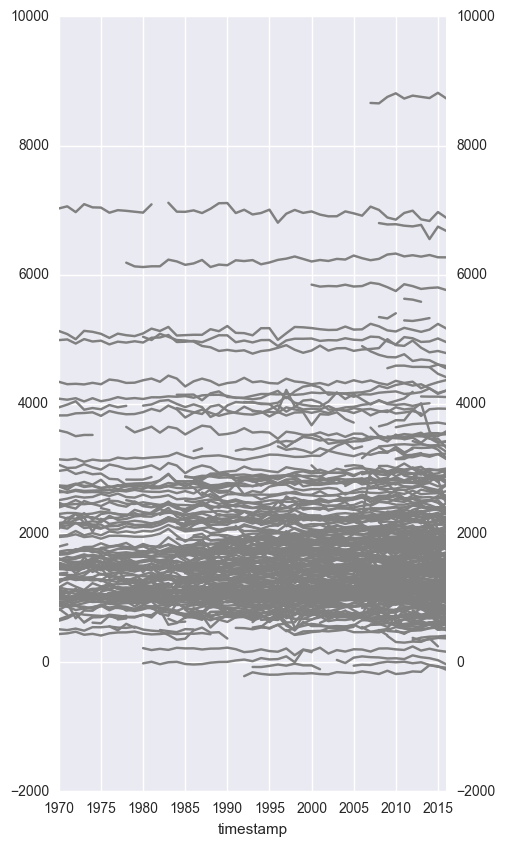

In [8]:
fig  = plt.figure(figsize=(5, 10))
ax = plt.subplot(111)

plot_data.plot(ax=ax, color='gray', legend=False)
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')

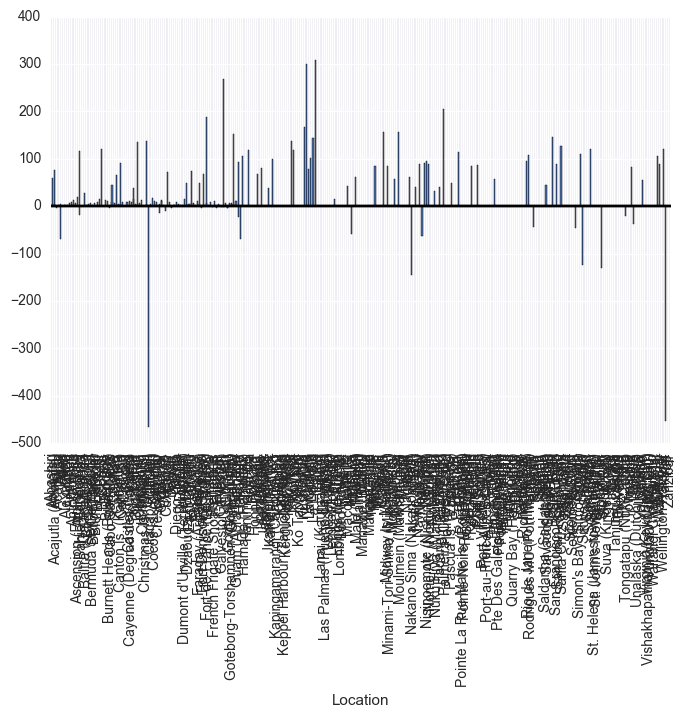

In [9]:
# Check the mean of first 5 values and last 5 values
start_end = pd.DataFrame([plot_data[:5].mean(), plot_data[-5:].mean()]).T

start_end['new_row'] = (1 - start_end[0]/start_end[1])*100

start_end.columns = ['Start', 'End', 'Percent Change']


#stations which have 5 data sets in the 70s and 5 data sets in the present, Out of 89, 15 have negative values

start_end_pct = start_end['Percent Change'].dropna()

start_end_pct.plot(kind='bar'); plt.axhline(0, color='k')


#sea level change

start_end['sea level change'] = start_end['End'] - start_end['Start']

start_end['sea level change'].plot(kind='bar'); plt.axhline(0, color='k')


In [10]:
plot_data

Location       Abashiri     Aburatsu  Acajutla (Acajutia)     Acapulco  \
timestamp                                                                
1970-12-31  1439.782123  1493.752809                  NaN          NaN   
1971-12-31  1438.613707  1506.490411                  NaN          NaN   
1972-12-31  1458.062500  1551.871585                  NaN          NaN   
1973-12-31  1457.232493  1522.041096                  NaN          NaN   
1974-12-31  1472.083056  1544.747945                  NaN          NaN   
1975-12-31  1422.985795  1559.673973                  NaN          NaN   
1976-12-31  1459.070822  1490.759563                  NaN          NaN   
1977-12-31  1419.989041  1509.947945                  NaN          NaN   
1978-12-31  1439.816438  1499.328767                  NaN          NaN   
1979-12-31  1420.150685  1495.106849                  NaN          NaN   
1980-12-31  1423.265027  1495.210383                  NaN          NaN   
1981-12-31  1474.140449  1517.495890                  NaN          NaN   
1982-12-31  1435.121547  1463.492997                  NaN          NaN   
1983-12-31  1460.581006  1471.186301                  NaN          NaN   
1984-12-31  1477.901639  1467.191257                  NaN          NaN   
1985-12-31  1445.854795  1447.536986                  NaN          NaN   
1986-12-31  1464.829912  1499.186301                  NaN          NaN   
1987-12-31  1455.852055  1483.295890                  NaN          NaN   
1988-12-31  1427.363388  1478.131148                  NaN          NaN   
1989-12-31  1421.191781  1543.123288                  NaN          NaN   
1990-12-31  1413.093151  1493.854795                  NaN          NaN   
1991-12-31  1450.035616  1531.893151                  NaN          NaN   
1992-12-31  1440.136612  1546.215847                  NaN          NaN   
1993-12-31  1458.279452  1510.079452                  NaN          NaN   
1994-12-31  1486.246575  1564.531507                  NaN          NaN   
1995-12-31  1512.484932  1513.093151                  NaN          NaN   
1996-12-31  1492.032787  1521.158470                  NaN          NaN   
1997-12-31  1521.608219  1538.350685                  NaN          NaN   
1998-12-31  1481.134247  1566.515068                  NaN          NaN   
1999-12-31  1503.504110  1587.800000                  NaN          NaN   
2000-12-31  1513.677612  1536.715847                  NaN          NaN   
2001-12-31  1482.008219  1579.290411                  NaN          NaN   
2002-12-31  1507.758904  1591.915068                  NaN          NaN   
2003-12-31  1477.717808  1583.852055                  NaN          NaN   
2004-12-31  1530.846995  1583.653005                  NaN          NaN   
2005-12-31  1522.484932  1521.643836                  NaN          NaN   
2006-12-31  1484.126027  1582.717808                  NaN          NaN   
2007-12-31  1488.191781  1553.975342                  NaN   949.468468   
2008-12-31  1472.319672  1558.538251                  NaN  1011.131148   
2009-12-31  1501.904110  1573.750685                  NaN  1043.345205   
2010-12-31  1518.232044  1587.926027          1412.432836  1008.857534   
2011-12-31  1513.945205  1598.419178          1471.454795   919.052632   
2012-12-31  1493.370879  1635.852459          1497.464286          NaN   
2013-12-31  1527.071233  1582.852055          1481.416667          NaN   
2014-12-31  1530.101648  1606.118132          1549.102410          NaN   
2015-12-31  1517.512329  1596.989041          1600.145963          NaN   
2016-12-31  1500.204420  1579.558011          1490.410959          NaN   

Location           Adak         Aden       Alert   Alexandria        Ambon  \
timestamp                                                                    
1970-12-31  1603.490251          NaN         NaN          NaN          NaN   
1971-12-31  1568.232877          NaN         NaN          NaN          NaN   
1972-12-31  1550.526316          NaN         NaN          NaN

In [11]:
first_measurement = df.groupby(['Location']).timestamp.first()
stations_1900 = first_measurement[first_measurement.dt.year <= 1900]
stations_1925 = first_measurement[first_measurement.dt.year <= 1925]
stations_1950 = first_measurement[first_measurement.dt.year <= 1950]
stations_1975 = first_measurement[first_measurement.dt.year <= 1975]
stations_1990 = first_measurement[first_measurement.dt.year <= 1990]
stations_2000 = first_measurement[first_measurement.dt.year >= 2000]
stations_2010 = first_measurement[first_measurement.dt.year >= 2010]
stations_2016 = first_measurement[first_measurement.dt.year >= 2016]
# stations_1970
#first_measurement.sort_values()
stations_1900.sort_values()

Location
Brest                        1846-01-04
Stockholm                    1889-01-01
Halifax                      1895-10-16
San Francisco (Fort Point)   1897-08-02
Name: timestamp, dtype: datetime64[ns]

In [12]:
last_measurement = df.groupby(['Location']).timestamp.last()

stations_2016_last = last_measurement[last_measurement.dt.year >= 2016]

#last_measurement.sort_values()
stations_2016_last.sort_values()
len(stations_2016_last)


data = df[(df.timestamp.dt.year >= 2016) &
          (df.Location.isin(stations_2000.index)) &
          (df.Country == 'Philippines')].groupby(['Location', 'timestamp']).tide.mean().unstack().T

# data = data.resample('1A').mean().apply(np.round)
# data = pd.rolling_mean(data.resample("1M", how='mean'), window=12, min_period=1)
data.head()
data.tail(50)

Location    Currmao  Lubang  Subic Bay
timestamp                             
2016-04-12      813     813       1095
2016-04-13      807     809       1090
2016-04-14      785     791       1072
2016-04-15      778     780       1065
2016-04-16      777     763       1059
2016-04-17      759     753       1053
2016-04-18      740     753       1050
2016-04-19      739     739       1049
2016-04-20      743     735       1042
2016-04-21      737     731       1037
2016-04-22      743     752       1053
2016-04-23      780     777       1079
2016-04-24      795     790       1090
2016-04-25      782     774       1074
2016-04-26      784     778       1080
2016-04-27      789     803       1094
2016-04-28      795     814       1098
2016-04-29      795     809       1096
2016-04-30      796     801       1089
2016-05-01      791     787       1082
2016-05-02      789     778       1080
2016-05-03      798     790       1096
2016-05-04      797     796       1102
2016-05-05      801     795       1102
2016-05-06      810     801       1111
2016-05-07      827     808       1123
2016-05-08      839     814       1129
2016-05-09      836     809       1117
2016-05-10      846     827       1127
2016-05-11      861     855       1140
2016-05-12      864     854       1138
2016-05-13      857     837       1128
2016-05-14      845     811       1107
2016-05-15      851     827       1123
2016-05-16      878     865       1156
2016-05-17      875     870       1158
2016-05-18      872     861       1150
2016-05-19      879     867       1156
2016-05-20      885     872       1158
2016-05-21      900     874       1165
2016-05-22      895     870       1160
2016-05-23      898     875       1162
2016-05-24      918     890       1169
2016-05-25      931     897       1179
2016-05-26      961     919       1196
2016-05-27      965     907       1179
2016-05-28      949     890       1163
2016-05-29      944     907       1169
2016-05-30      938     913       1173
2016-05-31      913     896       1161

The number of stations that measure tides until 2016 is: 237

## Stations in Detail
I will examine several stations in detail and also read some articles about the stations, I start with Hawaii and the stations Honolulu and Hilo

### Pacific: Hawaii

timestamp
1905-12-31    1260.642857
1906-12-31    1300.920548
1907-12-31    1309.761644
1908-12-31    1290.224044
1909-12-31    1202.747945
1910-12-31    1251.071233
1911-12-31    1230.180822
1912-12-31    1260.647541
1913-12-31    1290.632877
1914-12-31    1343.876712
1915-12-31    1373.810959
1916-12-31    1326.647541
1917-12-31    1307.200549
1918-12-31    1262.826923
1919-12-31    1341.347945
1920-12-31    1414.754098
1921-12-31    1368.604396
1922-12-31    1329.024658
1923-12-31    1319.339726
1924-12-31    1295.234973
1925-12-31    1343.652055
1926-12-31    1329.712329
1927-12-31    1300.161644
1928-12-31    1280.046448
1929-12-31    1295.676712
1930-12-31    1329.512329
1931-12-31    1341.950685
1932-12-31    1337.357923
1933-12-31    1324.268493
1934-12-31    1289.167123
                 ...     
1987-12-31    1378.786301
1988-12-31    1464.355191
1989-12-31    1401.180822
1990-12-31    1352.016438
1991-12-31    1396.038356
1992-12-31    1434.584459
1993-12-31    1419.123288
19

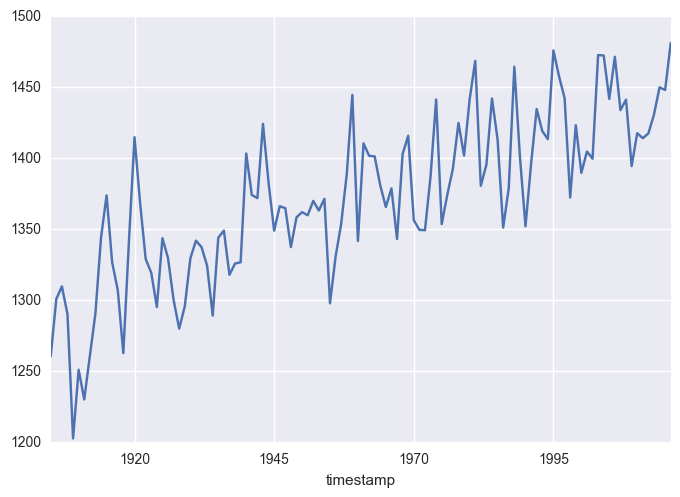

In [13]:
#The longest Pacific island tide gauge: Honolulu, Oahu Island (where Honolulu is on) is said to stay stable vertically (no subsidence)

#df[df.Location == 'Honolulu'].set_index('timestamp').tide.resample('1A').mean().plot()

honolulu = df[df.Location == 'Honolulu'].set_index('timestamp').tide.resample('1A').mean()

hono_pct = honolulu.pct_change()

hono_diff = honolulu.diff(1)

honolulu.plot()

honolulu


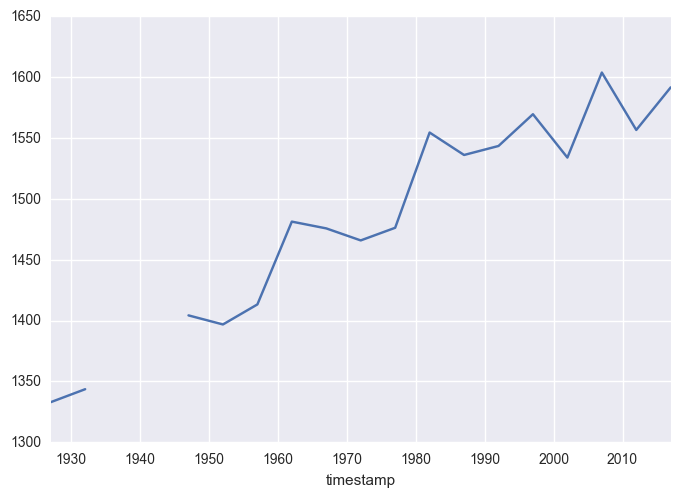

In [14]:
#Hilo, the rise is exceptional. Big Island (where Hilo is on) is said to sink (subsidence)

df[df.Location == 'Hilo'].set_index('timestamp').tide.resample('5A').mean().plot()

hilo = df[df.Location == 'Hilo'].set_index('timestamp').tide.resample('1A').mean()

### Pacific: Philippines
5 stations in the philippines

In [15]:
data_philippines = df[(df.Country == 'Philippines')]

first_measurement_phil = data_philippines.groupby(['Location']).timestamp.first()

first_measurement_phil.head()

Location
Currmao           2009-10-10
Davao             1998-01-01
Legaspi (Albay)   1984-01-01
Lubang            2010-06-12
Manila            2006-04-01
Name: timestamp, dtype: datetime64[ns]

In [16]:
last_measurement_phil = data_philippines.groupby(['Location']).timestamp.last()

last_measurement_phil.head()

Location
Currmao           2016-05-31
Davao             2016-02-17
Legaspi (Albay)   2016-03-27
Lubang            2016-05-31
Manila            2015-05-31
Name: timestamp, dtype: datetime64[ns]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


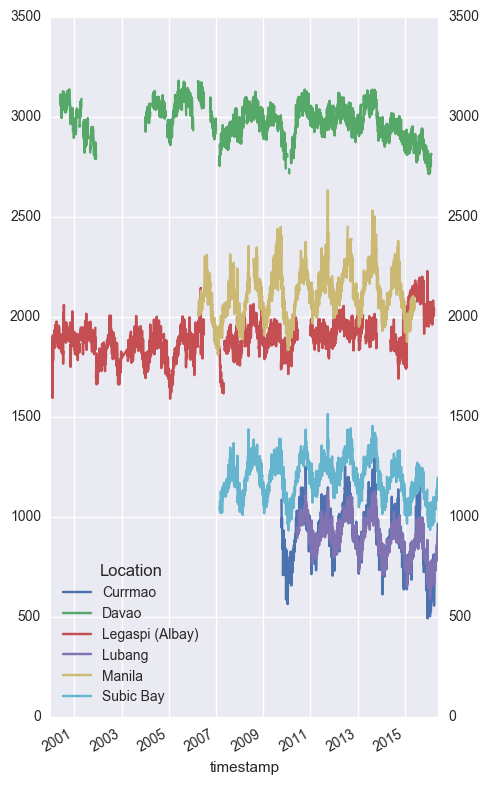

In [17]:
data_phil_plot = data_philippines[(df.timestamp.dt.year >= 2000)].groupby(['Location', 'timestamp']).tide.mean().unstack().T

data_phil_plot.tail(10)

fig  = plt.figure(figsize=(5, 10))
ax = plt.subplot(111)

data_phil_plot.plot(ax=ax, legend=True)
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')

In [26]:
cuxhaven = df[df.Location == 'Cuxhaven'].set_index('timestamp').tide.resample('1A').mean()

cuxhaven



timestamp
1917-12-31    4418.000000
1918-12-31    4975.317808
1919-12-31    4953.298630
1920-12-31    4961.019126
1921-12-31    5024.605479
1922-12-31    4976.901370
1923-12-31    5011.375342
1924-12-31    4960.833333
1925-12-31    5056.526027
1926-12-31    5044.178082
1927-12-31    5008.361644
1928-12-31    5022.535519
1929-12-31    4964.860274
1930-12-31    4992.550685
1931-12-31    5045.224658
1932-12-31    5030.265027
1933-12-31    4966.575342
1934-12-31    5020.172603
1935-12-31    5053.950685
1936-12-31    5031.281421
1937-12-31    4977.347945
1938-12-31    5050.452055
1939-12-31    4967.375342
1940-12-31    4997.571038
1941-12-31    4940.504110
1942-12-31    4958.276712
1943-12-31    5054.512329
1944-12-31    5077.931694
1945-12-31    5079.142466
1946-12-31    5036.575342
                 ...     
1987-12-31    5068.391781
1988-12-31    5155.948087
1989-12-31    5124.695890
1990-12-31    5205.136986
1991-12-31    5099.035616
1992-12-31    5094.718579
1993-12-31    5061.035616
19

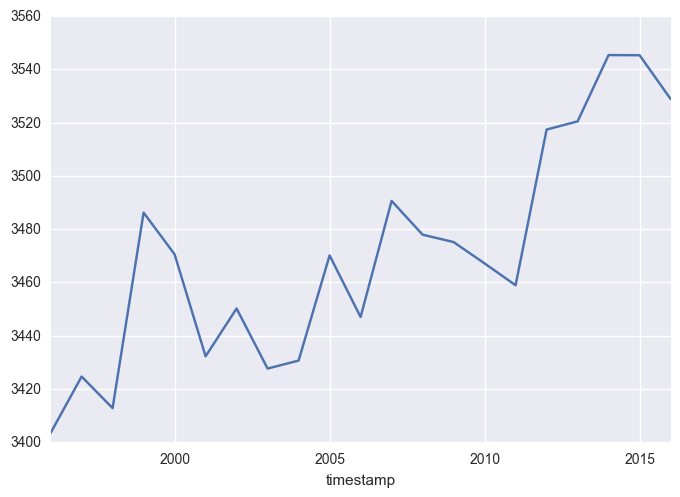

In [19]:
df[df.Location == 'Virginia Key (Bear Cut)'].set_index('timestamp').tide.resample('1A').mean().plot()

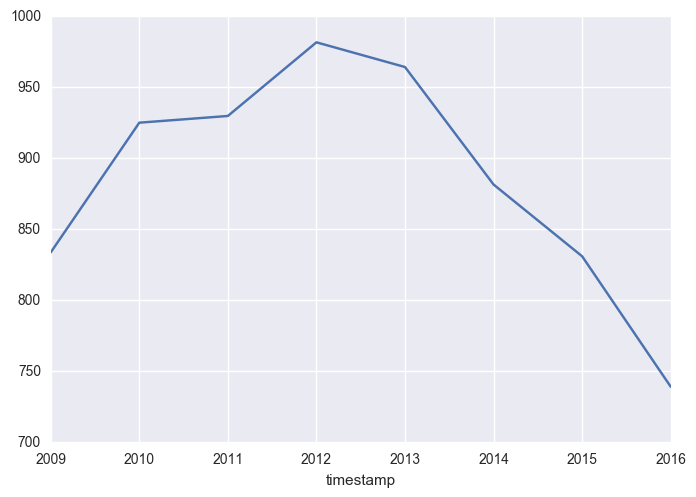

In [20]:
df[df.Location == 'Currmao'].set_index('timestamp').tide.resample('1A').mean().plot()

In [27]:
#data = df[(df.timestamp.dt.year >= 1990)].groupby(['Location', 'timestamp']).tide.mean().unstack().T
#data = data.resample('1A').mean().apply(np.round)

data = df[(df.timestamp.dt.year >= 1970)
          & (df.timestamp.dt.year <= 2016)].groupby(['Location', 'timestamp']).tide.mean().unstack().T

data = data.resample("1A").rolling(window=10, min_periods=1).mean().apply(np.round)

data.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: 
.resample() is now a deferred operation
You called rolling(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead


Location    Abashiri  Aburatsu  Acajutla (Acajutia)  Acapulco    Adak  Aden  \
timestamp                                                                     
1970-12-31    1440.0    1494.0                  NaN       NaN  1603.0   NaN   
1971-12-31    1439.0    1500.0                  NaN       NaN  1586.0   NaN   
1972-12-31    1445.0    1517.0                  NaN       NaN  1574.0   NaN   
1973-12-31    1448.0    1519.0                  NaN       NaN  1570.0   NaN   
1974-12-31    1453.0    1524.0                  NaN       NaN  1577.0   NaN   

Location    Alert  Alexandria  Ambon  Andenes    ...     Vungtau (Vung Tau)  \
timestamp                                        ...                          
1970-12-31    NaN         NaN    NaN      NaN    ...                    NaN   
1971-12-31    NaN         NaN    NaN      NaN    ...                    NaN   
1972-12-31    NaN         NaN    NaN      NaN    ...                    NaN   
1973-12-31    NaN         NaN    NaN      NaN    ...                    NaN   
1974-12-31    NaN         NaN    NaN      NaN    ...                    NaN   

Location    Waikelo  Waitangi Chatham Is.  Wake Is.  Wakkanai  Walvis Bay  \
timestamp                                                                   
1970-12-31      NaN                   NaN    1601.0    1694.0         NaN   
1971-12-31      NaN                   NaN    1570.0    1692.0         NaN   
1972-12-31      NaN                   NaN    1561.0    1699.0         NaN   
1973-12-31      NaN                   NaN    1560.0    1708.0         NaN   
1974-12-31      NaN                   NaN    1562.0    1711.0         NaN   

Location    Wellington Harbour  Yakutat     Yap  Zanzibar  
timestamp                                                  
1970-12-31              1024.0   2470.0  1419.0       NaN  
1971-12-31              1056.0   2440.0  1419.0       NaN  
1972-12-31              1056.0   2420.0  1419.0       NaN  
1973-12-31              1051.0   2439.0  1456.0       NaN  
1974-12-31              1051.0   2441.0  1437.0       NaN  

[5 rows x 290 columns]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


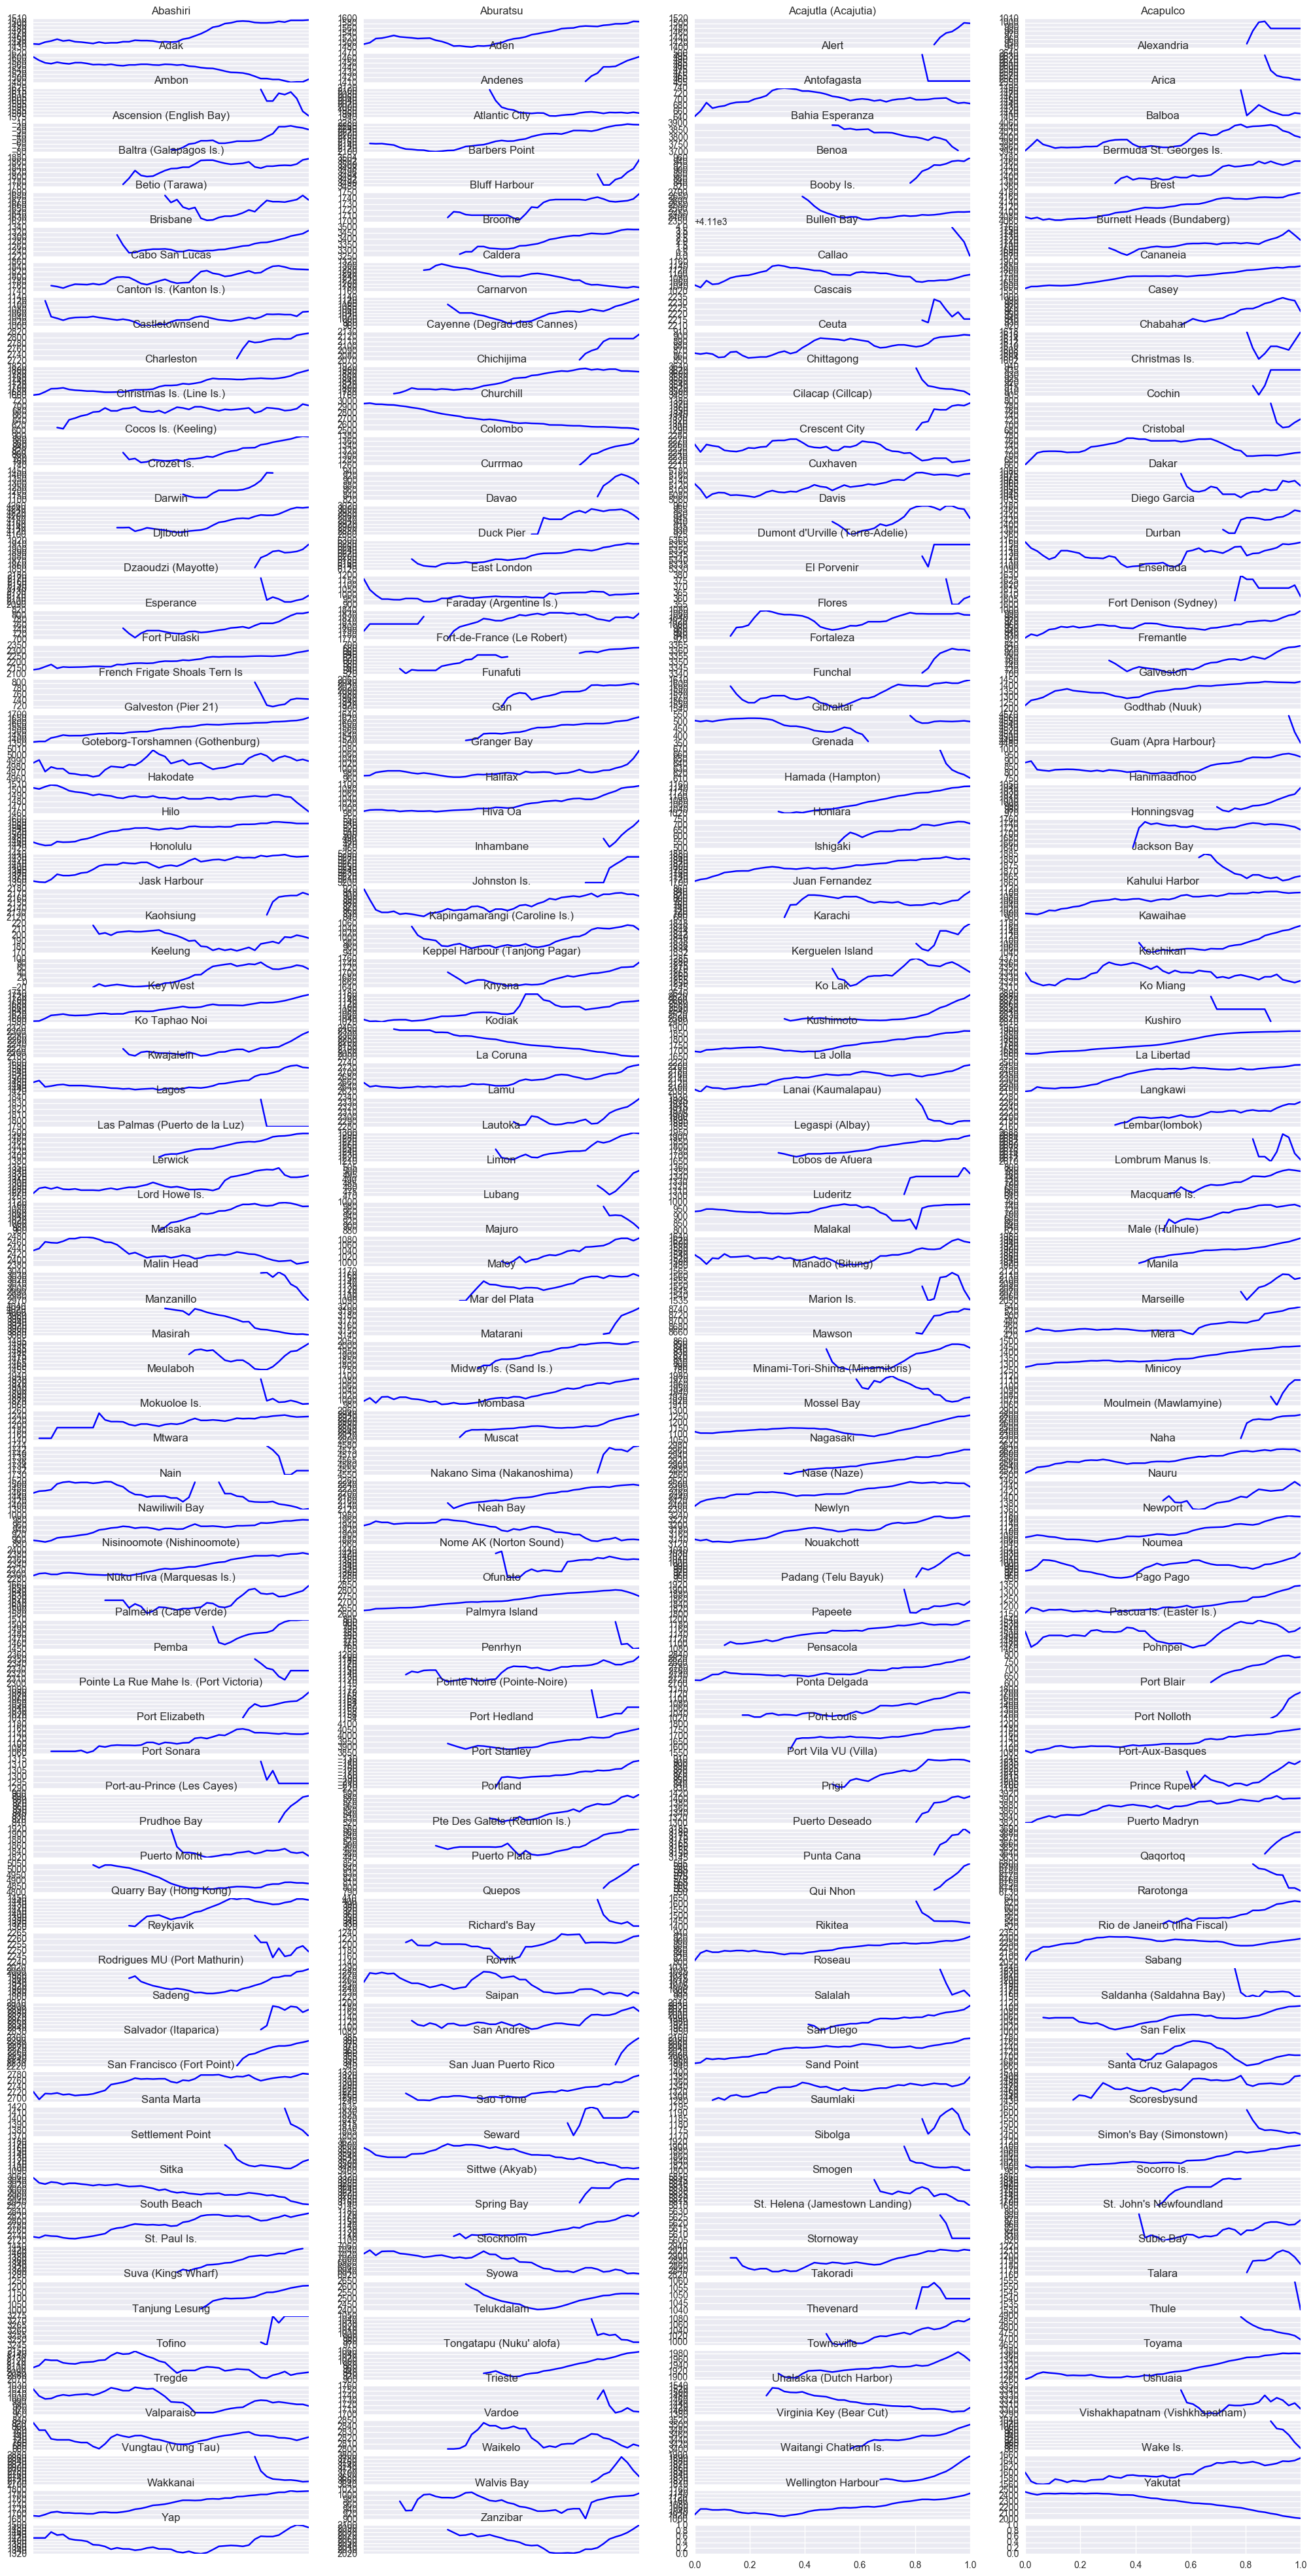

In [28]:
def plot_grid(df, cols=4, **kwargs):
    fig, axes = plt.subplots(nrows=int(np.ceil(len(df.columns) / cols)), ncols=cols)
    fig.set_figheight(6)
    fig.set_figwidth(8)

    for i, x in enumerate(df.columns):
        ax = axes[i // cols, i % cols]
        df[x].plot(ax=ax, color='blue', legend=False, label=False,
                   kind='line', stacked=False, sharex=False,
                   figsize=(25, 50))
        ax.set_title(x)
        ax.xaxis.set_visible(False)
    return fig

fig = plot_grid(data)
fig.show()

In [23]:
data = df[(df.timestamp.dt.year >= 1970)
          & (df.timestamp.dt.year <= 2016)].groupby(['Location', 'timestamp']).tide.mean().unstack().T
data = pd.rolling_mean(data.resample("1A").mean(), window=10, min_periods=1).apply(np.round)

data

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,min_periods=1,window=10).mean()
  app.launch_new_instance()


Location    Abashiri  Aburatsu  Acajutla (Acajutia)  Acapulco    Adak    Aden  \
timestamp                                                                       
1970-12-31    1440.0    1494.0                  NaN       NaN  1603.0     NaN   
1971-12-31    1439.0    1500.0                  NaN       NaN  1586.0     NaN   
1972-12-31    1445.0    1517.0                  NaN       NaN  1574.0     NaN   
1973-12-31    1448.0    1519.0                  NaN       NaN  1570.0     NaN   
1974-12-31    1453.0    1524.0                  NaN       NaN  1577.0     NaN   
1975-12-31    1448.0    1530.0                  NaN       NaN  1572.0     NaN   
1976-12-31    1450.0    1524.0                  NaN       NaN  1569.0     NaN   
1977-12-31    1446.0    1522.0                  NaN       NaN  1575.0     NaN   
1978-12-31    1445.0    1520.0                  NaN       NaN  1575.0     NaN   
1979-12-31    1443.0    1517.0                  NaN       NaN  1571.0     NaN   
1980-12-31    1441.0    1518.0                  NaN       NaN  1565.0     NaN   
1981-12-31    1445.0    1519.0                  NaN       NaN  1566.0     NaN   
1982-12-31    1442.0    1510.0                  NaN       NaN  1564.0     NaN   
1983-12-31    1443.0    1505.0                  NaN       NaN  1567.0     NaN   
1984-12-31    1443.0    1497.0                  NaN       NaN  1562.0     NaN   
1985-12-31    1446.0    1486.0                  NaN       NaN  1560.0     NaN   
1986-12-31    1446.0    1487.0                  NaN       NaN  1564.0     NaN   
1987-12-31    1450.0    1484.0                  NaN       NaN  1564.0     NaN   
1988-12-31    1449.0    1482.0                  NaN       NaN  1567.0     NaN   
1989-12-31    1449.0    1487.0                  NaN       NaN  1567.0     NaN   
1990-12-31    1448.0    1486.0                  NaN       NaN  1564.0     NaN   
1991-12-31    1445.0    1488.0                  NaN       NaN  1563.0     NaN   
1992-12-31    1446.0    1496.0                  NaN       NaN  1567.0     NaN   
1993-12-31    1445.0    1500.0                  NaN       NaN  1566.0     NaN   
1994-12-31    1446.0    1510.0                  NaN       NaN  1563.0     NaN   
1995-12-31    1453.0    1516.0                  NaN       NaN  1565.0     NaN   
1996-12-31    1456.0    1519.0                  NaN       NaN  1558.0     NaN   
1997-12-31    1462.0    1524.0                  NaN       NaN  1556.0     NaN   
1998-12-31    1468.0    1533.0                  NaN       NaN  1551.0     NaN   
1999-12-31    1476.0    1537.0                  NaN       NaN  1548.0     NaN   
2000-12-31    1486.0    1542.0                  NaN       NaN  1547.0     NaN   
2001-12-31    1489.0    1546.0                  NaN       NaN  1541.0     NaN   
2002-12-31    1496.0    1551.0                  NaN       NaN  1534.0     NaN   
2003-12-31    1498.0    1558.0                  NaN       NaN  1528.0     NaN   
2004-12-31    1502.0    1560.0                  NaN       NaN  1527.0     NaN   
2005-12-31    1503.0    1561.0                  NaN       NaN  1525.0     NaN   
2006-12-31    1502.0    1567.0                  NaN       NaN  1519.0     NaN   
2007-12-31    1499.0    1569.0                  NaN     949.0  1509.0  1412.0   
2008-12-31    1498.0    1568.0                  NaN     980.0  1498.0  1423.0   
2009-12-31    1498.0    1567.0                  NaN    1001.0  1498.0  1429.0   
2010-12-31    1499.0    1572.0               1412.0    1003.0  1494.0  1442.0   
2011-12-31    1502.0    1574.0               1442.0     986.0  1494.0  1442.0   
2012-12-31    1500.0    1578.0               1460.0     986.0  1487.0  1443.0   
2013-12-31    1505.0    1578.0               1466.0     986.0  1480.0  1449.0   
2014-12-31    1505.0    1580.0               1482.0     986.0  1482.0  1455.0   
2015-12-31    1505.0    1588.0               1502.0     986.0  1482.0  1459.0   
2016-12-31    1506.0    1587.0               1500.0     986.0  1495.0  1463.0   

Location    Alert  Alexandria 

timestamp
1915-12-31    3092.897233
1916-12-31    3078.155738
1917-12-31    3022.594521
1918-12-31    3029.687671
1919-12-31    3043.282192
1920-12-31    3056.724044
1921-12-31    3020.498630
1922-12-31    3045.057534
1923-12-31    3018.216438
1924-12-31    3082.661202
Freq: A-DEC, Name: tide, dtype: float64

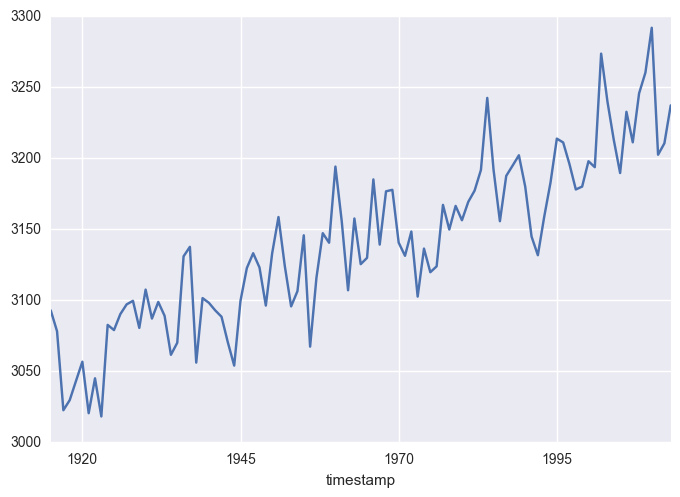

In [30]:
#Newlyn

newlyn = df[df.Location == 'Newlyn'].set_index('timestamp').tide.resample('1A').mean()

newlyn_pct = newlyn.pct_change()

newlyn_diff = newlyn.diff(1)

newlyn.plot()

newlyn.head(10)